In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures,StandardScaler
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline

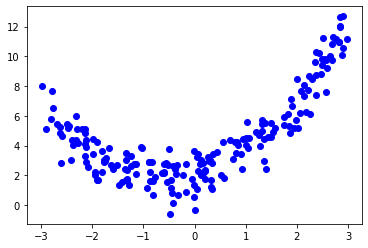

In [ ]:
data = pd.read_csv('PolyData.csv')
x = data['x'].values.reshape(-1,1)
y = data['y'].values.reshape(-1,1)
plt.scatter(data['x'],data['y'],color='b')

In [ ]:
data.head()

,x,y
0,-0.007332,3.630571
1,2.218216,7.747048
2,0.265452,3.266012
3,-1.677817,3.868567
4,-2.626743,4.860727


In [ ]:
X_train,X_test,y_train,y_test = train_test_split(x,y,random_state=2,test_size=0.2)

In [ ]:
lr = LinearRegression()

In [ ]:
lr.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_pred = lr.predict(X_test)
r2_score(y_test,y_pred)

0.3989177389501344

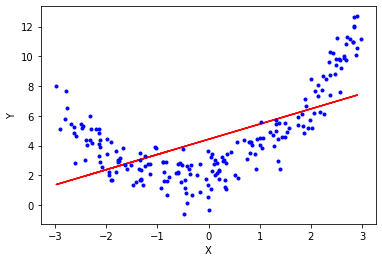

In [ ]:
plt.plot(X_train,lr.predict(X_train),color='r')
plt.plot(x,y,"b.")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [ ]:
#degree 2 -> x^0,x^1,x^2
poly = PolynomialFeatures(degree=2,include_bias=True)

X_train_trans = poly.fit_transform(X_train)
X_test_trans = poly.transform(X_test)


In [ ]:
print(X_train[0])
print(X_train_trans[0])

[-0.77580243]
[ 1.         -0.77580243  0.60186942]


In [ ]:
X_train_trans

In [ ]:
polylr = LinearRegression()

In [ ]:
polylr.fit(X_train_trans,y_train)

LinearRegression()

In [ ]:
ypred = polylr.predict(X_test_trans)
r2_score(ypred,y_test)

0.8894127124120901

In [ ]:
print(polylr.coef_)
print(polylr.intercept_)

[[0.         0.88651165 0.81365617]]
[2.0428165]


In [ ]:
X_new = np.linspace(-3,3,200).reshape(200,1)
X_new_poly = poly.transform(X_new)
y_new = polylr.predict(X_new_poly)

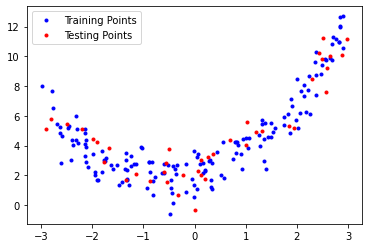

In [ ]:
plt.plot(X_train,y_train,"b.",label ='Training Points')
plt.plot(X_test,y_test,"r.",label ='Testing Points')
plt.legend()
plt.show()

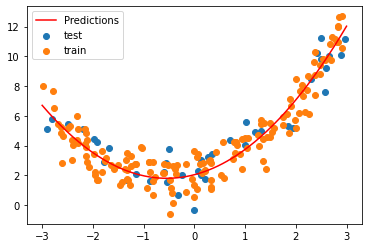

In [ ]:
plt.plot(X_new,y_new,"r-",label ="Predictions")
plt.scatter(X_test,y_test,label = "test")
plt.scatter(X_train,y_train,label= "train")
plt.legend()
plt.show()

In [ ]:
def polynomial_regression(degree):
    X_new = np.linspace(-3,3,200).reshape(200,1)
    X_new_poly = poly.transform(X_new)
    
    polybig_features = PolynomialFeatures(degree=degree,include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression=Pipeline([
        ("poly_features",polybig_features),
        ("std_scaler",std_scaler),
        ("lin_reg",lin_reg)
    ])
    polynomial_regression.fit(x,y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new,y_newbig,'r',label="Degree" +str(degree),linewidth=2)
    
    plt.plot(X_train,y_train,"b.",linewidth=3)
    plt.plot(X_test,y_test,"g.",linewidth=3)
    plt.legend(loc="best")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.axis([-3,3,0,10])
    plt.show()




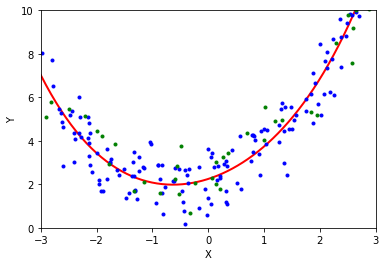

In [ ]:
poly_regression(4)

In [ ]:
def poly_regression(degree):
          x1= np.linspace(-3,3,200).reshape(200,1)
          x_new = poly.transform(x1)

          poly_features = PolynomialFeatures(degree=degree,include_bias=False)
          scale = StandardScaler()
          lr = LinearRegression()
          poly_regression=Pipeline([
                            ("poly_features",poly_features),
                            ("scale",scale),
                            ("lr",lr)
          ])
          poly_regression.fit(x,y)
          y_new = poly_regression.predict(x1)
          plt.plot(x1,y_new,"r",linewidth=2,label="Degree" +str(degree))

          plt.plot(X_train,y_train,"b.",linewidth=3)
          plt.plot(X_test,y_test,"g.",linewidth=3)
          plt.xlabel("X")
          plt.ylabel("Y")
          plt.axis([-3,3,0,10])
          plt.show()
 

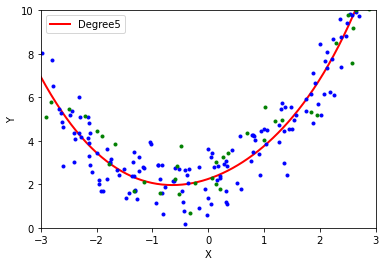

In [ ]:
polynomial_regression(5)

In [ ]:
poly.powers_

array([[0],
       [1],
       [2]])

In [ ]:
#3D polynomial regression

#x = 7 * np.random.rand(100,1) - 2.8